In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
from composition_stats import closure
import array as arr
from composition_stats import ilr,ilr_inv, clr, clr_inv

In [ ]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [23]:
df_elder = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\elder_total.csv", skiprows=3))
df_youth = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\youth_total.csv", skiprows=3))
df_kid = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\kid_total.csv", skiprows=3))

In [24]:
def prepare_data(df):
    df = df[df["Country Name"] == "Malaysia"]
    df.drop(['Country Code', 'Indicator Name',
             'Indicator Code'], inplace=True, axis=1)
    df = pd.melt(df, id_vars='Country Name')
    df = df.drop(['Country Name'], axis=1)
    if df[df['value']<2022].isnull().values.any():
        df.interpolate(method ='time')
    df.rename(columns={'variable': 'Year'}, inplace=True)
    df = df.dropna()
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    df=df[df.index>'1963-01-01']
    return df

In [25]:
df_list = [df_elder,df_youth,df_kid]
for x in range(0,len(df_list)):
    df_list[x] = prepare_data(df_list[x])
df_elder=df_list[0]
df_youth=df_list[1]
df_kid=df_list[2]
df_elder.rename(columns={'value': 'elder'}, inplace=True)
df_youth.rename(columns={'value': 'youth'}, inplace=True)
df_kid.rename(columns={'value': 'kid'}, inplace=True)
df_full = pd.concat([df_elder, df_youth, df_kid],axis=1)
df_full=df_full[df_full.index>'1963-01-01']
df_full.to_csv(relative_path+"\\age_structure_data\\df_full.csv")

In [26]:
df_train=df_full[df_full.index<'2010-01-01']
df_test=df_full[df_full.index>'2009-01-01']
df_train_ratio=closure(df_train)
df_test_ratio=closure(df_test)


In [27]:
df_test_ratio=pd.DataFrame(df_test_ratio)
df_train_ratio=pd.DataFrame(df_train_ratio)

In [28]:
df_test_ratio.index=df_test.index
df_train_ratio.index=df_train.index

In [29]:
df_test_ratio.columns=df_test.columns
df_train_ratio.columns=df_train.columns

In [30]:
df_train_ratio.to_csv(relative_path+"\\age_structure_data\\df_train.csv")
df_test_ratio.to_csv(relative_path+"\\age_structure_data\\df_test.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

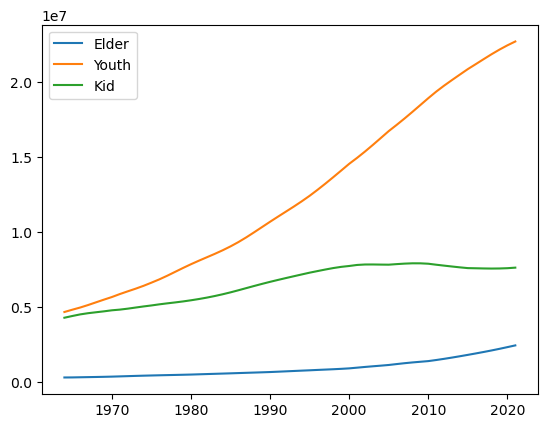

In [31]:
plt.plot(df_elder['elder'],label="Elder")
plt.plot(df_youth['youth'],label="Youth")
plt.plot(df_kid['kid'],label="Kid")

plt.legend(loc='best')
plt.show

In [32]:
data_proportion = closure(df_train) # make sure all add up to one

In [33]:
# FOR ILR
Transfomed_ILR = ilr(data_proportion)
Transfomed_ILR = pd.DataFrame(Transfomed_ILR, columns=[
                              'log_ratio_1', 'log_ratio_2'])
Transfomed_ILR.index = df_train.index 
Transfomed_ILR.to_csv(relative_path+"\\age_structure_data\\ILR_data.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

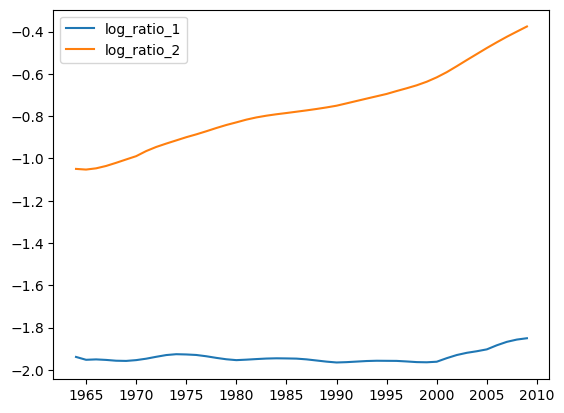

In [34]:
plt.plot(Transfomed_ILR['log_ratio_1'],label="log_ratio_1")
plt.plot(Transfomed_ILR['log_ratio_2'],label="log_ratio_2")

plt.legend(loc='best')
plt.show

In [35]:
# FOR SLR
e_arr=[]
y_arr=[]
k_arr=[]
for i in range(len(data_proportion)):
    e_ratio=float(data_proportion[i][0]/(data_proportion[i][1]+data_proportion[i][2]))
    e_log_ratio= math.log(e_ratio,10),
    e_arr.append(e_log_ratio)
    y_ratio=float(data_proportion[i][1]/(data_proportion[i][0]+data_proportion[i][2]))
    y_log_ratio= math.log(y_ratio,10),
    y_arr.append(y_log_ratio)
    k_ratio=float(data_proportion[i][2]/(data_proportion[i][0]+data_proportion[i][1]))
    k_log_ratio= math.log(k_ratio,10),
    k_arr.append(k_log_ratio)
df_e = pd.DataFrame(e_arr,columns=['log_ratio_e'])
df_y = pd.DataFrame(y_arr,columns=['log_ratio_y'])
df_k = pd.DataFrame(k_arr,columns=['log_ratio_k'])
df_SLR = pd.concat([df_e, df_y, df_k],axis=1)
df_SLR.index = df_train.index 
df_SLR.to_csv(relative_path+"\\age_structure_data\\SLR_data.csv")


<function matplotlib.pyplot.show(close=None, block=None)>

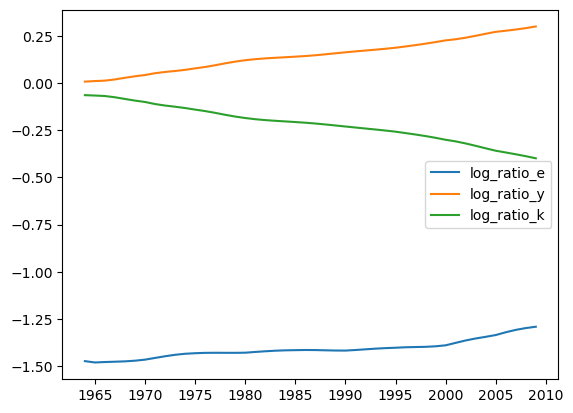

In [36]:
plt.plot(df_SLR['log_ratio_e'],label="log_ratio_e")
plt.plot(df_SLR['log_ratio_y'],label="log_ratio_y")
plt.plot(df_SLR['log_ratio_k'],label="log_ratio_k")

plt.legend(loc='best')
plt.show

In [37]:
# FOR SLR_2
log1_arr=[]
log2_arr=[]
for i in range(len(data_proportion)):
    log1=float(data_proportion[i][0]/(data_proportion[i][1]))
    log1_ratio= math.log(log1,10),
    log1_arr.append(log1_ratio)
    log2=float(data_proportion[i][0]/(data_proportion[i][2]))
    log2_ratio= math.log(log2,10),
    log2_arr.append(log2_ratio)
df_log1 = pd.DataFrame(log1_arr,columns=['log_ratio_1'])
df_log2 = pd.DataFrame(log2_arr,columns=['log_ratio_2'])
df_SLR2 = pd.concat([df_log1, df_log2],axis=1)
df_SLR2.index = df_train.index 
df_SLR2.to_csv(relative_path+"\\age_structure_data\\SLR2_data.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

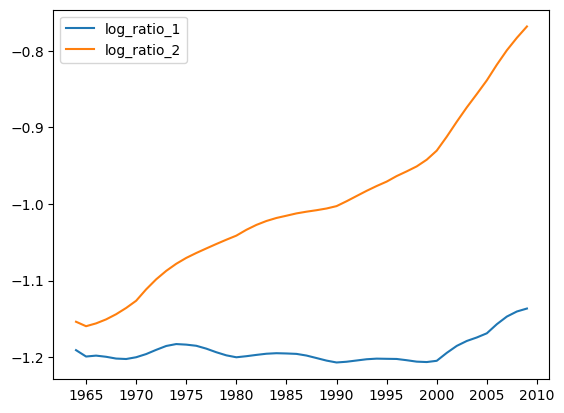

In [38]:
plt.plot(df_SLR2['log_ratio_1'],label="log_ratio_1")
plt.plot(df_SLR2['log_ratio_2'],label="log_ratio_2")

plt.legend(loc='best')
plt.show

In [39]:
full_proportion = closure(df_full)

In [40]:
log1_arr=[]
log2_arr=[]
for i in range(len(full_proportion)):
    log1=float(full_proportion[i][0]/(full_proportion[i][1]))
    log1_ratio= math.log(log1,10),
    log1_arr.append(log1_ratio)
    log2=float(full_proportion[i][0]/(full_proportion[i][2]))
    log2_ratio= math.log(log2,10),
    log2_arr.append(log2_ratio)
df_log1 = pd.DataFrame(log1_arr,columns=['log_ratio_1'])
df_log2 = pd.DataFrame(log2_arr,columns=['log_ratio_2'])
df_SLR2 = pd.concat([df_log1, df_log2],axis=1)
df_SLR2.index = df_full.index 
df_SLR2.to_csv(relative_path+"\\age_structure_data\\SLR2_full_data.csv")